In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import os
os.getcwd()

'/content'

# ***Set parameters***

In [0]:
#Name of the Clustering algorithm
__algo__ = "MBKMEANS"               

#Name of the Word Embeddings used (glove, w2v, ftt), MUST set directory below
__emb__ = "ftt" #@param ["glove", "w2v", "ftt"] {allow-input: true}

#Name of Sentence Embedding algorithm used
__sentemb__ = "normalmean" #@param ["pmeans5", "normalmean"] {allow-input: true}           

#Number of records to be read from files
recnum =                      30000#@param {type: "number"} 

#Number of Clusters
k =                             350#@param {type: "number"} 

usesqrt = False                   #@param ["False", "True"] {type:"raw", allow-input: true}

#Random Sampling to be True/False for records which are read
randomsample = True              #@param ["False", "True"] {type:"raw", allow-input: true} 

#Directory where embeddings are saved for that selected embedding
embedDir = "./drive/My Drive/ColabOutput/FTXSentEmbs" #@param ["./drive/My Drive/ColabOutput/FTXSentEmbs", "./drive/My Drive/ColabOutput/W2VSentEmbs", "./drive/My Drive/ColabOutput/MegaSentEmbs"] {allow-input: true}


#Directory where models are saved
modelDir = "/content/drive/My Drive/Colab Notebooks/BTechProject_Venkatesh/models/"           

#Directory Where Megadf is to be saved
megadfDir = "/content/drive/My Drive/Colab Notebooks/BTechProject_Venkatesh/MegaDfs/"         

#Directory where plots are saved
plotDir = "/content/drive/My Drive/Colab Notebooks/BTechProject_Venkatesh/plots/"           

#Directory where performance and distribution params are to be stored
metadataDir = "/content/drive/My Drive/Colab Notebooks/BTechProject_Venkatesh/modelMetaData/" 

#Directory where test outcomes are saved
dumpDir = "/content/drive/My Drive/Colab Notebooks/BTechProject_Venkatesh/dump/"              

# Actual Code

### imports and time

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import os, subprocess, sys
import datetime, time
import pickle

### File Settings

In [247]:
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist if f[-3:]=="pkl"])
filenum = len(filelist)
templist = filelist[:filenum]
smalllist = [w[:40]+"/"+w[40:] for w in templist]
print("Length of Smalllist: ", len(smalllist))

Length of Smalllist:  123


### Number of Records
It is Recommended to Set this at the top parameters

In [0]:
recnum = recnum

In [0]:
def convert2normalmean(x):
  reqlen = int(len(x)/5)
  return x[:reqlen]

### Read all the pandas dataframes

In [250]:
%%time
megadf = pd.DataFrame()

if randomsample == True:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        if __sentemb__ == "normalmean":
          tempdf["embedding"] = tempdf["embedding"].apply(convert2normalmean)
        megadf = megadf.append(tempdf, ignore_index = True)
    megadf = megadf.sample(recnum, random_state=42)
else:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        if __sentemb__ == "normalmean":
          tempdf["embedding"] = tempdf["embedding"].apply(convert2normalmean)
        megadf = megadf.append(tempdf, ignore_index = True)
        if megadf.shape[0] >= recnum:
            megadf = megadf[:recnum]
            break

print("megadf.shape: ", megadf.shape)

randomsample:  True
megadf.shape:  (30000, 3)
CPU times: user 4.77 s, sys: 4.17 s, total: 8.94 s
Wall time: 22 s


In [251]:
predata = megadf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(30000, 300)


### Number of Clusters
It is Recommended to Set this at the top parameters

In [252]:
if usesqrt == True:
    print("usesqrt: ", usesqrt)
    sqrt_k = int(np.sqrt(data.shape[0]))
    k = int(sqrt_k)
else:
    print("usesqrt: ", usesqrt)
    k = k
print("k: ", k)

usesqrt:  False
k:  350


## Clustering
Please modify the functions here to change algorithm

In [253]:
%%time
print("Starting Clustering Process")
start_time = time.time()
model = cluster.MiniBatchKMeans(n_clusters=k, n_init = 20, random_state=42, batch_size=32, max_iter=1000, verbose=1)
model.fit(data)
end_time = time.time()
timetrain = round(end_time-start_time, 2)
print("done! {}".format(timetrain))
print("k_means.fit(data) Done!")

Starting Clustering Process
Init 1/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 1/20: 16.024515
Init 2/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 2/20: 25.496020
Init 3/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 3/20: 15.079584
Init 4/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 4/20: 21.770072
Init 5/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 5/20: 21.310481
Init 6/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 6/20: 26.860540
Init 7/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 7/20: 18.821567
Init 8/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 8/20: 27.515084
Init 9/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 9/20: 23.485901
Init 10/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 10/20: 18.983425
Init 11/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 11/20: 13.980955
Init 12/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 12/20: 18.042801
Init 13/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 13/20: 22.652561
Init 14/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 14/20: 21.254877
Init 15/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 15/20: 16.797460
Init 16/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 16/20: 18.546319
Init 17/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 17/20: 13.482800
Init 18/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 18/20: 20.597867
Init 19/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 19/20: 28.789531
Init 20/20 with method: k-means++


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 20/20: 22.594582
Minibatch iteration 1/938000: mean batch inertia: 0.981050, ewa inertia: 0.981050 
Minibatch iteration 2/938000: mean batch inertia: 0.799245, ewa inertia: 0.980662 
Minibatch iteration 3/938000: mean batch inertia: 0.851608, ewa inertia: 0.980386 
Minibatch iteration 4/938000: mean batch inertia: 0.756763, ewa inertia: 0.979909 
Minibatch iteration 5/938000: mean batch inertia: 0.699205, ewa inertia: 0.979311 
Minibatch iteration 6/938000: mean batch inertia: 0.941660, ewa inertia: 0.979230 
Minibatch iteration 7/938000: mean batch inertia: 0.680154, ewa inertia: 0.978592 
Minibatch iteration 8/938000: mean batch inertia: 0.729578, ewa inertia: 0.978061 
Minibatch iteration 9/938000: mean batch inertia: 0.656507, ewa inertia: 0.977375 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 10/938000: mean batch inertia: 0.692766, ewa inertia: 0.976768 
Minibatch iteration 11/938000: mean batch inertia: 0.774251, ewa inertia: 0.976336 
M

### Saving the output data into vars

In [0]:
centroids = model.cluster_centers_
labels = model.labels_
megadf["clusterlabel"]=labels
centroidDF = pd.DataFrame(centroids)


## Plotting

Text(0.5, 1.0, 'MBKMEANS with k=350 records=30000 features=300 using ftt')

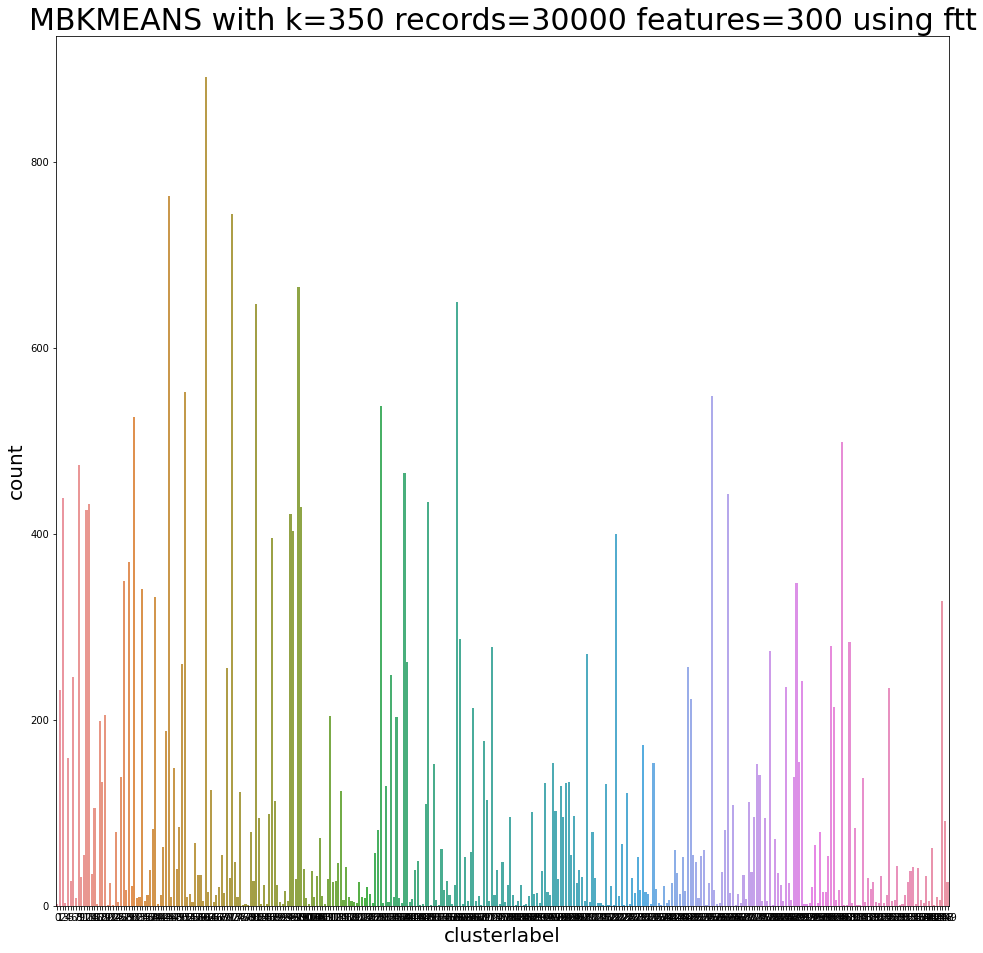

In [255]:
plt.figure(figsize=(16,16))
titlestring = "{} with k={} records={} features={} using {}".format(__algo__, k, data.shape[0], data.shape[1], __emb__)
snsplot = sns.countplot("clusterlabel", data=megadf)
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        titlestring,
        fontdict = {'fontsize' : 30}
    )

### *Name given to saved files*

In [256]:
features = data.shape[1]
records = data.shape[0]
name = "{}_{}_{}_K{}_R{}_F{}".format(__algo__, __emb__, __sentemb__, k, records, features)
name

'MBKMEANS_ftt_normalmean_K350_R30000_F300'

### Saving Data

Save model

In [0]:
modelname = "{}_model.pkl".format(name)
pickle.dump(model, open(modelDir + modelname, 'wb'))

Save Plot

In [0]:
snspltname = "{}_plt.png".format(name)
snsplot.figure.savefig(plotDir + snspltname)

Save Megadf

In [0]:
clusterdfname = "{}_clustered_megadf.pkl".format(name)
megadf.to_pickle(megadfDir + clusterdfname)

Save Centroids

In [260]:
centroidDF = pd.DataFrame(centroids)
centroidDFname = "{}_centroids.pkl".format(name)
centroidDF.to_pickle(megadfDir + centroidDFname)
print(centroidDF.shape)

(350, 300)


#### Open dataframe to test

In [261]:
sub = megadf[["id", "title", "clusterlabel"]]
sub.tail()

,id,title,clusterlabel
18574,9013351,Trace (Layered Neck-piece and Feather Wrap),18
44937,333129,"Equivalence of conservative, free, linear prog...",17
127685,371081,The impact of structural adjustment programmes...,34
159718,7379292,"Neville Street, Water Lane, Great Wilson Street",51
142878,1537402,Paperless examination boards promote wider and...,149


In [262]:
megadf.columns

Index(['id', 'title', 'embedding', 'clusterlabel'], dtype='object')

# Performance Testing and Distribution


In [0]:
metadata = pd.DataFrame(columns=["Name", "Algo", "WordEmb", "SentEmb", "K", "R", "F", "SS", "CSavg", "CSmin", "CSmax", "T2Pavg", "T2LM", "T2LMP", "MEM"])

In [264]:
metadict = {
    "Name":None,                     #Name of the save file prefix
    "Algo":None,                     #Name of the Clustering algorithm
    "WordEmb":None,                  #Name of the Word Embeddings used (glove, w2v, ftt)
    "SentEmb":None,                  #Name of Sentence Embedding algorithm used 
    "K":None, "R":None, "F":None,    #Number of clusters, records and fetures
    "T2T":None,                      #Time required to train model
    "SS":None,                       #Silhoutte Score
    "DBS":None,                      #Davis Bouldin Score
    "CSavg":None,                    #Average Cluster Size
    "CSmin":None,                    #Minimum Cluster Size
    "CSmax":None,                    #Maximum Cluster Size
    "T2Pavg":None,                   #Average Time To Predict cluster of one record
    "T2LM":None,                     #Average Time to Load Model
    "T2LMP":None,                    #Amortized time to Predict after loading the model
    "MEM":None                      #Memory used by the Model
    }
metadict

{'Algo': None,
 'CSavg': None,
 'CSmax': None,
 'CSmin': None,
 'DBS': None,
 'F': None,
 'K': None,
 'MEM': None,
 'Name': None,
 'R': None,
 'SS': None,
 'SentEmb': None,
 'T2LM': None,
 'T2LMP': None,
 'T2Pavg': None,
 'T2T': None,
 'WordEmb': None}

In [265]:
metadict["Name"]=name
metadict["Algo"]=__algo__
metadict["WordEmb"]=__emb__
metadict["SentEmb"]=__sentemb__
metadict["K"]=k
metadict["R"]=recnum
metadict["F"]=features
metadict

{'Algo': 'MBKMEANS',
 'CSavg': None,
 'CSmax': None,
 'CSmin': None,
 'DBS': None,
 'F': 300,
 'K': 350,
 'MEM': None,
 'Name': 'MBKMEANS_ftt_normalmean_K350_R30000_F300',
 'R': 30000,
 'SS': None,
 'SentEmb': 'normalmean',
 'T2LM': None,
 'T2LMP': None,
 'T2Pavg': None,
 'T2T': None,
 'WordEmb': 'ftt'}

#### Time to train

In [0]:
metadict["T2T"]=timetrain

#### Scores

In [0]:
ss = silhouette_score(data, labels, metric = 'euclidean')
dbs = davies_bouldin_score(data, labels)
metadict["SS"]=ss
metadict["DBS"]=dbs

#### Cluster Size

In [268]:
clusterdata = megadf.groupby("clusterlabel", as_index=True).size().reset_index(name="count")
clusterdata.head()

,clusterlabel,count
0,0,2
1,1,232
2,2,439
3,3,3
4,4,159


In [0]:
clusterdfname = "{}_clustered_counts.pkl".format(name)
clusterdata.to_pickle(megadfDir + clusterdfname)

In [270]:
countdata = clusterdata.groupby("count").size().reset_index(name="clusters")
display(countdata.head(3))
display(countdata.tail(3))

,count,clusters
0,1,24
1,2,21
2,3,18


,count,clusters
144,744,1
145,764,1
146,891,1


In [0]:
metadict["CSmax"] = max(clusterdata["count"])
metadict["CSmin"] = min(clusterdata["count"])
metadict["CSavg"] = np.mean(clusterdata["count"])

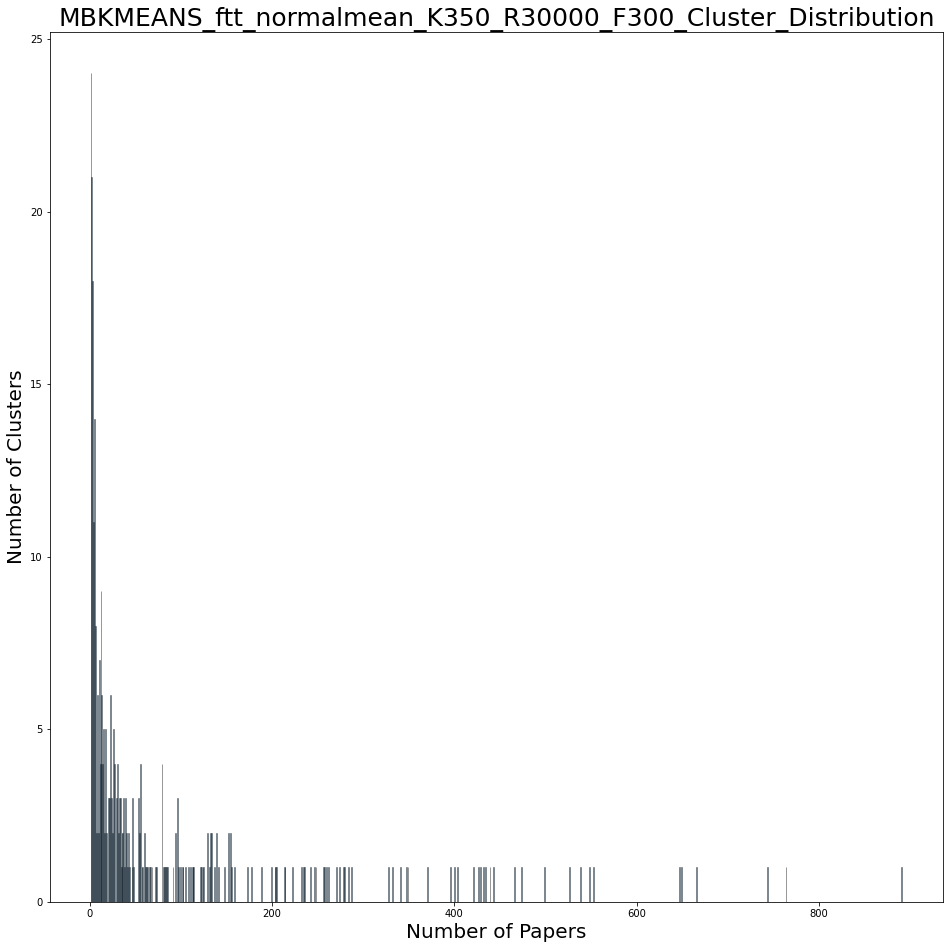

In [272]:
%matplotlib inline
plt.figure(figsize=(16,16))

sns.axes_style("whitegrid", {"axes.grid":True, 
                            'axes.spines.left': False,
                             'axes.spines.bottom': False,
                             'axes.spines.right': False,
                             'axes.spines.top': False})


titlestring = "{}_Cluster_Distribution".format(name)
snsplot = sns.distplot(clusterdata["count"], kde=False, bins=max(clusterdata["count"]),
                      hist_kws={'edgecolor':'black'},)
snsplot.set(xlabel="Number of Papers", ylabel="Number of Clusters")
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        titlestring,
        fontdict = {'fontsize' : 25}
    )
plt.show()



In [0]:
snspltname = "{}_Cluster_Distribution.png".format(name)
snsplot.figure.savefig(plotDir + snspltname)

#### Prediction Time Performance

In [274]:
testdf = pd.DataFrame()
if recnum < 2000:
    samplenum = int(recnum / 10)
else:
    samplenum = 2000

for f in smalllist:
    tempdf = pd.read_pickle(f)
    if __sentemb__ == "normalmean":
      tempdf["embedding"] = tempdf["embedding"].apply(convert2normalmean)
    testdf = megadf.append(tempdf, ignore_index = True, sort = False)
testdf = testdf.sample(samplenum, random_state=int(time.time()%100000))
predata = testdf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(2000, 300)


In [275]:
print("Starting Predicting Performance")
testmodel = model
start_time = time.time()
for d in data:
    lb = testmodel.predict(d)
end_time = time.time()
timetest = end_time-start_time
avgtime = timetest/data.shape[0]
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2Pavg"]=avgtime

Starting Predicting Performance
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignm

In [276]:
print("Starting Loading Performance")
loadruns = 50
start_time = time.time()
for i in range(loadruns):
    testmodel = pickle.load(open(modelDir + modelname, 'rb'))
end_time = time.time()
timetest = end_time-start_time
avgtime = timetest/loadruns
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2LM"] = avgtime
avgtime

Starting Loading Performance
Avgtime: 0.0025393295288085936 Totaltime: 0.1269664764404297


0.0025393295288085936

In [277]:
print("Starting Amortized Performance")
loadruns = 5
avglist = []

for i in range(loadruns):
    start_time = time.time()
    testmodel = pickle.load(open(modelDir + modelname, 'rb'))
    for d in data:
        lb = testmodel.predict(d)
    end_time = time.time()
    timetest = (end_time-start_time)/data.shape[0]
    avglist.append(timetest)

timetest = np.sum(avglist)
avgtime = np.mean(avglist)
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2LMP"] = avgtime
avgtime

Streaming output truncated to the last 5000 lines.
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Comp

0.001393077754974365

In [278]:
modelsize = sys.getsizeof(pickle.dumps(model))
print("modelsize:", modelsize, "bytes")
metadict["MEM"]=modelsize

modelsize: 963706 bytes


In [279]:
metadict

{'Algo': 'MBKMEANS',
 'CSavg': 89.02077151335311,
 'CSmax': 891,
 'CSmin': 1,
 'DBS': 2.338134725984944,
 'F': 300,
 'K': 350,
 'MEM': 963706,
 'Name': 'MBKMEANS_ftt_normalmean_K350_R30000_F300',
 'R': 30000,
 'SS': 0.041265190059232494,
 'SentEmb': 'normalmean',
 'T2LM': 0.0025393295288085936,
 'T2LMP': 0.001393077754974365,
 'T2Pavg': 0.0014392966032028198,
 'T2T': 17.36,
 'WordEmb': 'ftt'}

In [280]:
metadata = metadata.append(metadict, ignore_index=True)
metadata

,Name,Algo,WordEmb,SentEmb,K,R,F,SS,CSavg,CSmin,CSmax,T2Pavg,T2LM,T2LMP,MEM,DBS,T2T
0,MBKMEANS_ftt_normalmean_K350_R30000_F300,MBKMEANS,ftt,normalmean,350,30000,300,0.041265,89.020772,1,891,0.001439,0.002539,0.001393,963706,2.338135,17.36


In [0]:
metadataname = "{}_metadata.pkl".format(name)
metadata.to_pickle(metadataDir + metadataname)